In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from shutil import copyfile
from tensorflow import keras
# from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import DirectoryIterator
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping




2022-12-27 15:18:00.881288: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-27 15:18:00.915110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2022-12-27 15:18:00.915136: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
img_height, img_width = 28, 28
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "resize_images_V3/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "resize_images_V3/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "resize_images_V3/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 4755 files belonging to 26 classes.
Found 4306 files belonging to 26 classes.
Found 55 files belonging to 26 classes.


In [3]:
# labels name

# 1  = kapital
# 2  = koma
# 3  = nomer
# 4  = petik_2
# 5  = tanda_kurung
# 6  = tanda_seru
# 7  = tanda_tanya
# 8  = titik
# 9  = titik_2
# 10 = titik_koma

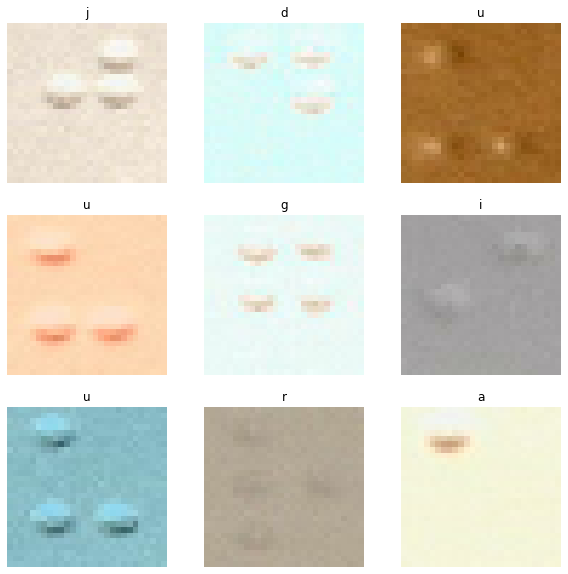

In [4]:
class_names = ["a", "b", "c", "d", "e", "f",
               "g", "h", "i", "j", "k", "l",
               "m", "n", "o", "p", "q", "r",
               "s", "t", "u", "v", "w", "x",
               "y", "z"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
K.clear_session()

model_ckpt = ModelCheckpoint('model_braille_sendiri.h5 ', save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8, verbose=0)
early_stop = EarlyStopping(patience=15, verbose=1)

In [6]:
model = L.Input(shape=(28, 28, 3))
x = L.SeparableConv2D(64, (3, 3), activation='relu')(model)
x = L.MaxPooling2D((2, 2))(x)
x = L.SeparableConv2D(128, (3, 3), activation='relu')(x)
x = L.MaxPooling2D((2, 2))(x)
x = L.SeparableConv2D(256, (2, 2), activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64)(x)
x = L.LeakyReLU()(x)
x = L.Dense(26, activation='softmax')(x)

model = Model(model, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [8]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=50)
                    # callbacks=[model_ckpt,reduce_lr])

Epoch 1/50
149/149 [==============================] - 3s 14ms/step - loss: 3.2383 - accuracy: 0.0515 - val_loss: 3.1934 - val_accuracy: 0.0759
Epoch 2/50
149/149 [==============================] - 2s 13ms/step - loss: 2.8770 - accuracy: 0.1546 - val_loss: 2.1756 - val_accuracy: 0.3549
Epoch 3/50
149/149 [==============================] - 2s 13ms/step - loss: 1.7308 - accuracy: 0.4709 - val_loss: 1.3179 - val_accuracy: 0.5938
Epoch 4/50
149/149 [==============================] - 2s 13ms/step - loss: 0.9722 - accuracy: 0.7108 - val_loss: 0.7993 - val_accuracy: 0.7843
Epoch 5/50
149/149 [==============================] - 2s 13ms/step - loss: 0.5667 - accuracy: 0.8381 - val_loss: 0.5028 - val_accuracy: 0.8595
Epoch 6/50
149/149 [==============================] - 2s 13ms/step - loss: 0.3714 - accuracy: 0.8982 - val_loss: 0.3952 - val_accuracy: 0.8892
Epoch 7/50
149/149 [==============================] - 2s 13ms/step - loss: 0.2716 - accuracy: 0.9205 - val_loss: 0.3099 - val_accuracy: 0.9171

In [9]:
model.predict(val_ds)
model.save("new_Model.h5", include_optimizer=True)

135/135 [==============================] - 1s 4ms/step


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 26, 26, 64)       283       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 11, 11, 128)      8896      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                         

In [11]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(val_ds, batch_size=128)
print("test loss, test acc:", results)



Evaluate on test data
135/135 [==============================] - 1s 4ms/step - loss: 0.2481 - accuracy: 0.9677
test loss, test acc: [0.24805864691734314, 0.9677194356918335]


In [12]:
model = load_model('new_Model.h5')
acc = model.evaluate(val_ds)[1]
print('model accuracy: {}'.format(round(acc,4)))

135/135 [==============================] - 1s 4ms/step - loss: 0.2481 - accuracy: 0.9677
model accuracy: 0.9677


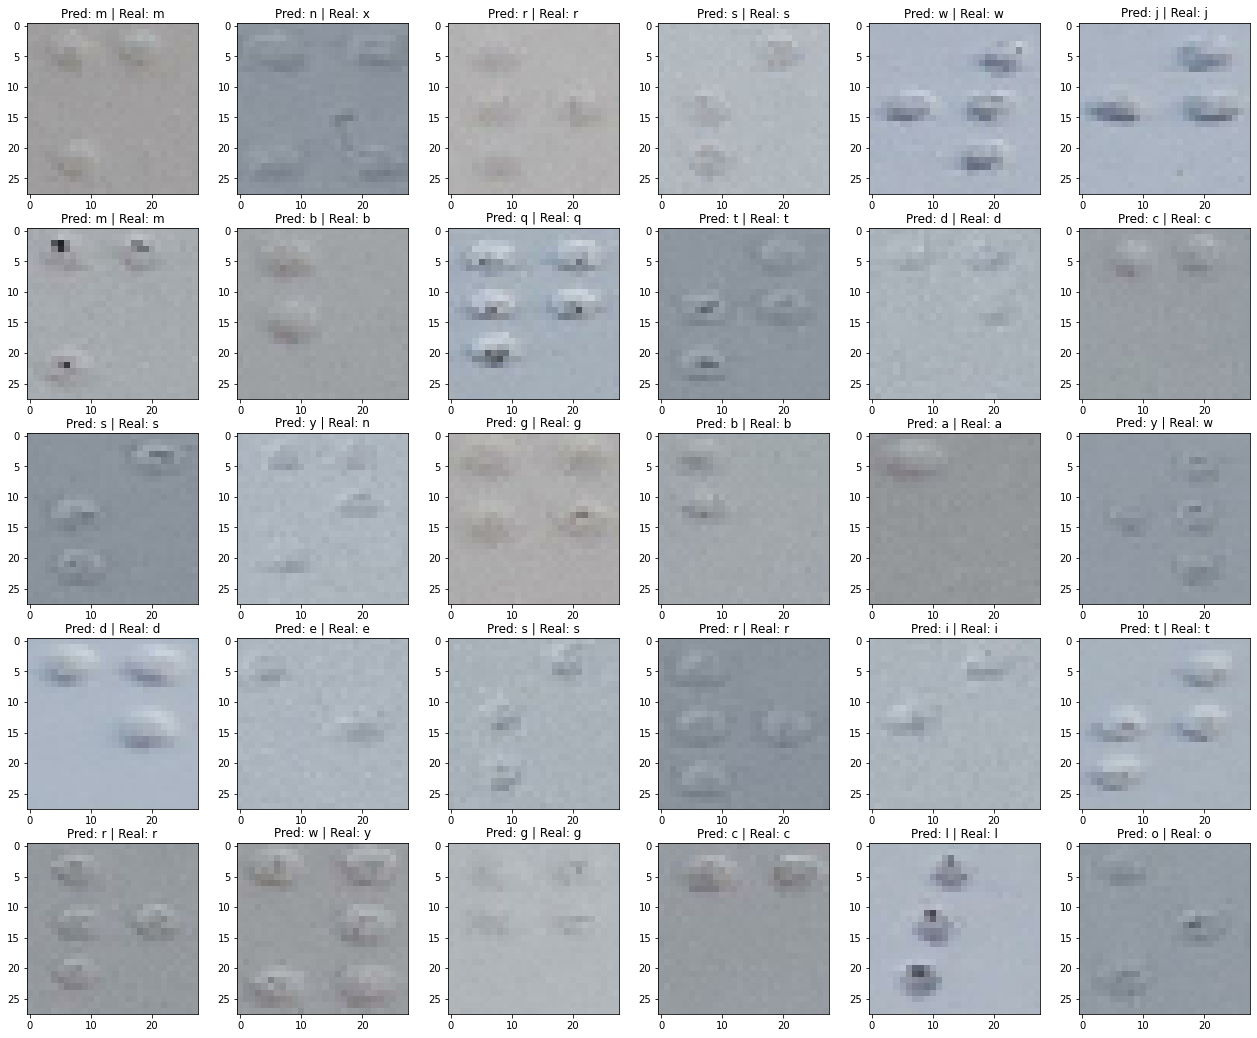

In [24]:
import numpy

plt.figure(figsize=(22, 22))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [30]:
predicted_batch = model.predict(val_ds)
predicted_id = np.argmax(predicted_batch, axis=1)
predicted_label_batch = class_names[predicted_id]

print(predicted_batch)

135/135 [==============================] - 0s 3ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

In [20]:
true_categories = tf.concat([y for x, y in val_ds], axis=0)

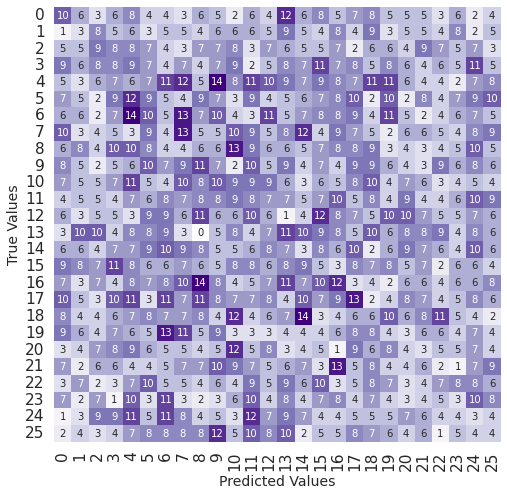

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_categories, predicted_id)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 10},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [19]:
model = load_model('new_Model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("new_model_braille.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpz3g97u80/assets


INFO:tensorflow:Assets written to: /tmp/tmpz3g97u80/assets
2022-12-10 01:20:59.655047: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-10 01:20:59.655074: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-10 01:20:59.655511: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpz3g97u80
2022-12-10 01:20:59.657033: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-12-10 01:20:59.657055: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpz3g97u80
2022-12-10 01:20:59.662382: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-10 01:20:59.663731: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-12-10 01:20:59.716134: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

513356